In [23]:
from vierlinden.config import model_output_path
from vierlinden.data.loader import VierlindenDataProcessor
from vierlinden.model.model import NHiTSTrainingWrapper, NHiTSPredictionWrapper
from vierlinden.model.model import NHiTSPredictionWrapper
from pytorch_forecasting.metrics import QuantileLoss, MAE, MASE, RMSE

seed = 42

context_length = 50
prediction_length = 10
batch_size = 32
num_workers = 18

def main(arg : str):
    dp = VierlindenDataProcessor()
    df = dp.load_processed_data()
    df = dp.prepare_for_target(df, arg)
    
    training_df, test_df = dp.split_data(df)
    
    nhits_wrapper = NHiTSTrainingWrapper(training_df, 
                                         target_col = arg, 
                                         context_length = context_length, 
                                         prediction_length = prediction_length,
                                         batch_size = batch_size, 
                                         num_workers = num_workers)
    optimal_lr = nhits_wrapper.find_optimal_learningrate(seed = seed)
    
    print(f"Optimal learning rate for {arg}: {optimal_lr}")
    
    best_model = nhits_wrapper.train(optimal_lr, loss = RMSE(), seed = seed)
    
    return nhits_wrapper, test_df

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden


INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


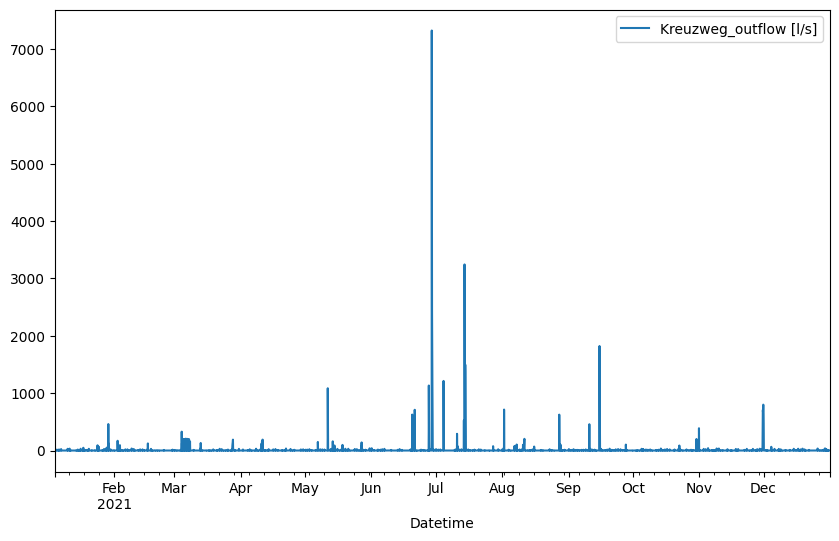

In [24]:
dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, 'Kreuzweg_outflow [l/s]')
dp.plot_target_col('Kreuzweg_outflow [l/s]')

In [25]:
dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, 'Kreuzweg_outflow [l/s]')

training_df, test_df = VierlindenDataProcessor.split_data(df, train_frac=0.9)
test_df.shape

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


(868, 24)

In [26]:
nhits_wrapper, test_df = main('Kreuzweg_outflow [l/s]')
nhits_wrapper.save_trained_model(model_output_path + "/"  + 'NHiTS_Kreuzweg_model.pt')

model = nhits_wrapper.best_model

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden


INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.
INFO:vierlinden.model.model:Training and validation data and data loaders created successfully.
Global seed set to 42
Finding best initial lr: 100%|██████████| 100/100 [00:01<00:00, 66.62it/s]
INFO:vierlinden.model.model:Start setting up trainer and network.
Global seed set to 42
INFO:vierlinden.model.model:Setup succesful. Starting training procedure.

  | Name            | Type           | Params
---------------------------------------------------
0 | loss            | RMSE           | 0     
1 | logging_metrics | ModuleList     | 0     
2 | embeddings      | MultiEmbedding | 0     
3 | model           | NHiTS          | 919 K 
---------------------------------------------------
919 K     Trainable params
0         Non-trainable params
919 K     Total params
3.679     Total estimated 

Optimal learning rate for Kreuzweg_outflow [l/s]: 0.00012589254117941672
Epoch 0: 100%|██████████| 193/193 [00:29<00:00,  6.51it/s, v_num=0, train_loss_step=45.40, val_loss=8.920, train_loss_epoch=118.0]

Metric val_loss improved. New best score: 8.919


Epoch 1: 100%|██████████| 193/193 [00:36<00:00,  5.36it/s, v_num=0, train_loss_step=79.70, val_loss=8.610, train_loss_epoch=112.0]

Metric val_loss improved by 0.312 >= min_delta = 0.0001. New best score: 8.607


Epoch 2: 100%|██████████| 193/193 [00:35<00:00,  5.47it/s, v_num=0, train_loss_step=166.0, val_loss=8.280, train_loss_epoch=110.0]

Metric val_loss improved by 0.322 >= min_delta = 0.0001. New best score: 8.285


Epoch 3: 100%|██████████| 193/193 [00:33<00:00,  5.69it/s, v_num=0, train_loss_step=14.50, val_loss=8.070, train_loss_epoch=105.0]

Metric val_loss improved by 0.214 >= min_delta = 0.0001. New best score: 8.071


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s, v_num=0, train_loss_step=14.50, val_loss=8.070, train_loss_epoch=105.0]          

Swapping scheduler `ReduceLROnPlateau` for `SWALR`


Epoch 4: 100%|██████████| 193/193 [00:36<00:00,  5.27it/s, v_num=0, train_loss_step=57.00, val_loss=7.900, train_loss_epoch=99.30]

Metric val_loss improved by 0.168 >= min_delta = 0.0001. New best score: 7.903


Epoch 5: 100%|██████████| 193/193 [00:33<00:00,  5.69it/s, v_num=0, train_loss_step=21.60, val_loss=7.810, train_loss_epoch=94.00]

Metric val_loss improved by 0.088 >= min_delta = 0.0001. New best score: 7.815


Epoch 7: 100%|██████████| 193/193 [00:34<00:00,  5.63it/s, v_num=0, train_loss_step=199.0, val_loss=7.770, train_loss_epoch=93.60]

Metric val_loss improved by 0.049 >= min_delta = 0.0001. New best score: 7.766


Epoch 8: 100%|██████████| 193/193 [00:36<00:00,  5.32it/s, v_num=0, train_loss_step=28.30, val_loss=7.750, train_loss_epoch=94.10]

Metric val_loss improved by 0.017 >= min_delta = 0.0001. New best score: 7.749


Epoch 10: 100%|██████████| 193/193 [00:35<00:00,  5.49it/s, v_num=0, train_loss_step=30.70, val_loss=7.710, train_loss_epoch=92.30]

Metric val_loss improved by 0.041 >= min_delta = 0.0001. New best score: 7.708


Epoch 11: 100%|██████████| 193/193 [01:30<00:00,  2.13it/s, v_num=0, train_loss_step=63.60, val_loss=7.680, train_loss_epoch=92.00]

Metric val_loss improved by 0.025 >= min_delta = 0.0001. New best score: 7.684


Epoch 12: 100%|██████████| 193/193 [00:35<00:00,  5.40it/s, v_num=0, train_loss_step=76.10, val_loss=7.650, train_loss_epoch=92.50]

Metric val_loss improved by 0.038 >= min_delta = 0.0001. New best score: 7.645


Epoch 13: 100%|██████████| 193/193 [00:33<00:00,  5.70it/s, v_num=0, train_loss_step=28.60, val_loss=7.600, train_loss_epoch=91.90]

Metric val_loss improved by 0.049 >= min_delta = 0.0001. New best score: 7.596


Epoch 14: 100%|██████████| 193/193 [00:40<00:00,  4.73it/s, v_num=0, train_loss_step=17.60, val_loss=7.580, train_loss_epoch=89.80]

Metric val_loss improved by 0.021 >= min_delta = 0.0001. New best score: 7.575


Epoch 15: 100%|██████████| 193/193 [00:34<00:00,  5.59it/s, v_num=0, train_loss_step=121.0, val_loss=7.550, train_loss_epoch=91.20]

Metric val_loss improved by 0.023 >= min_delta = 0.0001. New best score: 7.552


Epoch 16: 100%|██████████| 193/193 [00:37<00:00,  5.08it/s, v_num=0, train_loss_step=4.920, val_loss=7.540, train_loss_epoch=91.70]

Metric val_loss improved by 0.016 >= min_delta = 0.0001. New best score: 7.536


Epoch 17: 100%|██████████| 193/193 [00:37<00:00,  5.13it/s, v_num=0, train_loss_step=37.50, val_loss=7.460, train_loss_epoch=91.00]

Metric val_loss improved by 0.073 >= min_delta = 0.0001. New best score: 7.463


Epoch 18: 100%|██████████| 193/193 [00:41<00:00,  4.62it/s, v_num=0, train_loss_step=531.0, val_loss=7.460, train_loss_epoch=91.00]

Metric val_loss improved by 0.007 >= min_delta = 0.0001. New best score: 7.456


Epoch 19: 100%|██████████| 193/193 [00:33<00:00,  5.73it/s, v_num=0, train_loss_step=26.00, val_loss=7.400, train_loss_epoch=91.20]

Metric val_loss improved by 0.057 >= min_delta = 0.0001. New best score: 7.398


Epoch 20: 100%|██████████| 193/193 [00:33<00:00,  5.72it/s, v_num=0, train_loss_step=74.90, val_loss=7.360, train_loss_epoch=87.20]

Metric val_loss improved by 0.037 >= min_delta = 0.0001. New best score: 7.361


Epoch 21: 100%|██████████| 193/193 [00:34<00:00,  5.65it/s, v_num=0, train_loss_step=15.70, val_loss=7.320, train_loss_epoch=88.80]

Metric val_loss improved by 0.043 >= min_delta = 0.0001. New best score: 7.318


Epoch 22: 100%|██████████| 193/193 [00:42<00:00,  4.50it/s, v_num=0, train_loss_step=130.0, val_loss=7.250, train_loss_epoch=88.20]

Metric val_loss improved by 0.070 >= min_delta = 0.0001. New best score: 7.248


Epoch 23: 100%|██████████| 193/193 [00:36<00:00,  5.32it/s, v_num=0, train_loss_step=118.0, val_loss=7.230, train_loss_epoch=89.30]

Metric val_loss improved by 0.022 >= min_delta = 0.0001. New best score: 7.226


Epoch 24: 100%|██████████| 193/193 [00:38<00:00,  5.06it/s, v_num=0, train_loss_step=55.80, val_loss=7.200, train_loss_epoch=88.60]

Metric val_loss improved by 0.029 >= min_delta = 0.0001. New best score: 7.197


Epoch 26: 100%|██████████| 193/193 [00:37<00:00,  5.21it/s, v_num=0, train_loss_step=17.80, val_loss=7.150, train_loss_epoch=88.10]

Metric val_loss improved by 0.045 >= min_delta = 0.0001. New best score: 7.152


Epoch 27: 100%|██████████| 193/193 [00:35<00:00,  5.51it/s, v_num=0, train_loss_step=41.00, val_loss=7.110, train_loss_epoch=86.50]

Metric val_loss improved by 0.040 >= min_delta = 0.0001. New best score: 7.113


Epoch 29: 100%|██████████| 193/193 [00:33<00:00,  5.69it/s, v_num=0, train_loss_step=229.0, val_loss=7.040, train_loss_epoch=90.10]

Metric val_loss improved by 0.070 >= min_delta = 0.0001. New best score: 7.042


Epoch 31: 100%|██████████| 193/193 [00:36<00:00,  5.31it/s, v_num=0, train_loss_step=42.90, val_loss=6.990, train_loss_epoch=87.70]

Metric val_loss improved by 0.051 >= min_delta = 0.0001. New best score: 6.992


Epoch 33: 100%|██████████| 193/193 [00:37<00:00,  5.17it/s, v_num=0, train_loss_step=17.90, val_loss=6.990, train_loss_epoch=89.00]

Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 6.991


Epoch 34: 100%|██████████| 193/193 [00:36<00:00,  5.36it/s, v_num=0, train_loss_step=69.80, val_loss=6.980, train_loss_epoch=88.50]

Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 6.983


Epoch 35: 100%|██████████| 193/193 [00:45<00:00,  4.24it/s, v_num=0, train_loss_step=13.90, val_loss=6.930, train_loss_epoch=88.80]

Metric val_loss improved by 0.051 >= min_delta = 0.0001. New best score: 6.931


Epoch 36: 100%|██████████| 193/193 [00:35<00:00,  5.39it/s, v_num=0, train_loss_step=53.90, val_loss=6.920, train_loss_epoch=86.80]

Metric val_loss improved by 0.006 >= min_delta = 0.0001. New best score: 6.925


Epoch 37: 100%|██████████| 193/193 [00:34<00:00,  5.56it/s, v_num=0, train_loss_step=41.30, val_loss=6.880, train_loss_epoch=87.00]

Metric val_loss improved by 0.043 >= min_delta = 0.0001. New best score: 6.882


Epoch 38: 100%|██████████| 193/193 [00:35<00:00,  5.41it/s, v_num=0, train_loss_step=78.10, val_loss=6.880, train_loss_epoch=87.00]

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 6.880


Epoch 39: 100%|██████████| 193/193 [00:35<00:00,  5.41it/s, v_num=0, train_loss_step=16.60, val_loss=6.850, train_loss_epoch=84.80]

Metric val_loss improved by 0.025 >= min_delta = 0.0001. New best score: 6.854


Epoch 43: 100%|██████████| 193/193 [00:49<00:00,  3.94it/s, v_num=0, train_loss_step=12.40, val_loss=6.820, train_loss_epoch=83.80]

Metric val_loss improved by 0.030 >= min_delta = 0.0001. New best score: 6.825


Epoch 53: 100%|██████████| 193/193 [00:40<00:00,  4.73it/s, v_num=0, train_loss_step=22.90, val_loss=6.860, train_loss_epoch=85.00]

Monitored metric val_loss did not improve in the last 10 records. Best score: 6.825. Signaling Trainer to stop.


Epoch 53: 100%|██████████| 193/193 [00:41<00:00,  4.69it/s, v_num=0, train_loss_step=22.90, val_loss=6.860, train_loss_epoch=85.00]


INFO:vierlinden.model.model:Training procedure completed.
INFO:vierlinden.model.model:Cleaning up logging files.
INFO:vierlinden.model.model:Logging files cleaned up.


[117.82669067382812, 112.1523208618164, 110.3559341430664, 105.46395111083984, 99.34015655517578, 94.01885223388672, 93.46224212646484, 93.5575180053711, 94.09654235839844, 95.18781280517578, 92.31449127197266, 92.02814483642578, 92.46763610839844, 91.880126953125, 89.82551574707031, 91.2223129272461, 91.72982788085938, 90.95475769042969, 91.01821899414062, 91.15042877197266, 87.2325439453125, 88.7695083618164, 88.20032501220703, 89.32636260986328, 88.56891632080078, 88.49278259277344, 88.0582504272461, 86.5012435913086, 87.33943939208984, 90.0796127319336, 85.94099426269531, 87.71395111083984, 88.85527801513672, 88.95621490478516, 88.48480987548828, 88.75418853759766, 86.8060302734375, 87.0234375, 87.03072357177734, 84.76264953613281, 85.97875213623047, 86.9244384765625, 83.9847412109375, 83.75281524658203, 88.4490737915039, 86.0918197631836, 87.91030883789062, 85.47393035888672, 87.62081909179688, 86.29931640625, 88.56105041503906, 84.34077453613281, 84.87750244140625, 84.97653961181

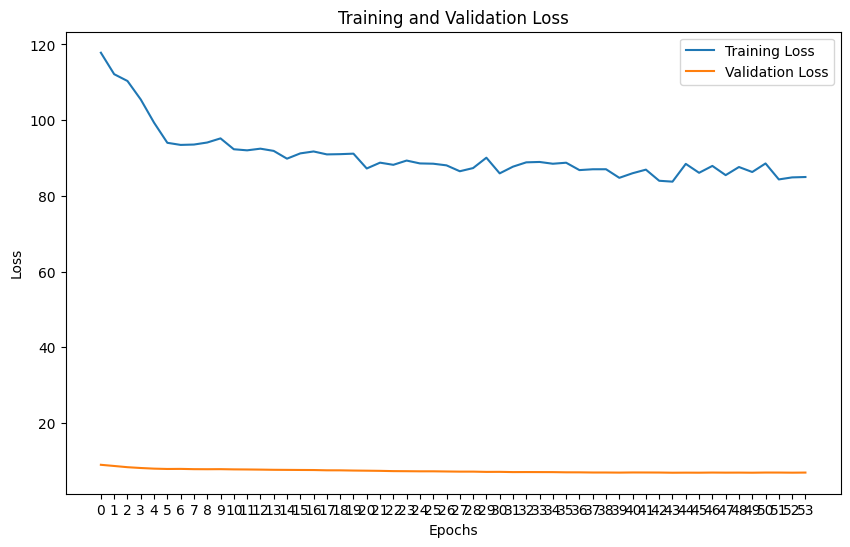

In [27]:
print(nhits_wrapper.metrics_callback.metrics["train_loss"])
print(nhits_wrapper.metrics_callback.metrics["val_loss"])

nhits_wrapper.plot_training_result()

In [3]:
model = NHiTSTrainingWrapper.load_trained_model(model_output_path + "/"  + 'NHiTS_Kreuzweg_model_mase.pt')

In [28]:
prediction_wrapper = NHiTSPredictionWrapper(model, context_length=context_length, prediction_length=prediction_length, target_col='Kreuzweg_outflow [l/s]')
prediction_df = prediction_wrapper.predict(test_df)

/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


In [29]:
prediction_df.iloc[110:120]

,Datetime,Schieber Position_pval,Oberwasser_pval,Unterwasser_pval,Durchflumenge_pval,Berechnete Durchflussmenge_pval,Fllstand SWS_pval,Fllstand RWS_pval,Strom P1_pval,Strom P2_pval,...,Strom Pumpe 1_pval,Strom Pumpe 2_pval,Fllstand Pumpensumpf_pval1,Strom Pumpe 1_pval1,Strom Pumpe 2_pval1,Strom Pumpe 3_pval,Niederschlag,Füllstand_RRB,Kreuzweg_outflow [l/s],Predicted Forecast
110,2021-11-30 10:00:00,100.0,18.578947,12.140625,41.424528,39.932039,102.900000,35.000000,7.000000,0.000000,...,1.064516,0.677419,91.021739,3.548387,0.0,1.0,0.900000,0.67,0.000000,"[0.7518970966339111, 0.6027169227600098, 0.524..."
111,2021-11-30 11:00:00,100.0,18.518072,12.318841,41.348624,38.694444,75.859649,35.000000,5.842105,0.000000,...,0.580645,0.000000,91.051948,0.000000,0.0,1.0,0.885366,0.67,0.000000,"[0.9111577272415161, 1.165448784828186, 1.6982..."
112,2021-11-30 12:00:00,100.0,20.239437,13.214286,46.018868,46.231481,75.633333,35.000000,5.066667,0.000000,...,0.580645,1.000000,89.252632,3.709677,0.0,1.0,1.237500,0.67,0.000000,"[1.6920280456542969, 2.4258999824523926, 2.281..."
113,2021-11-30 13:00:00,100.0,34.907216,22.023256,130.716667,109.172414,106.850000,35.000000,4.616667,16.666667,...,3.540984,5.078125,109.024096,9.016393,0.0,1.0,2.779592,0.67,80.327074,"[1.3115606307983398, 1.2398765087127686, 0.433..."
114,2021-11-30 14:00:00,100.0,39.345679,24.333333,157.921053,129.577982,112.516667,35.416667,3.716667,25.150000,...,5.492308,5.000000,126.337079,10.000000,0.0,1.0,2.937391,0.69,337.788898,"[58.735618591308594, 35.57804489135742, 23.857..."
115,2021-11-30 15:00:00,100.0,36.766234,22.929577,142.059829,115.964286,118.483333,36.000000,4.000000,16.633333,...,5.343284,5.000000,143.558824,10.000000,0.0,1.0,2.153571,0.70,519.748537,"[242.96279907226562, 145.29147338867188, 88.75..."
116,2021-11-30 16:00:00,100.0,39.385542,24.225000,158.060870,131.165138,117.816667,36.500000,3.933333,22.133333,...,5.380282,5.000000,153.394737,10.000000,0.0,1.0,2.651282,1.05,654.730181,"[359.7052917480469, 216.91604614257812, 132.84..."
117,2021-11-30 17:00:00,100.0,27.098765,17.081081,84.297297,73.449541,134.150000,37.000000,5.750000,1.833333,...,5.109375,5.000000,150.426966,10.000000,0.0,1.0,0.975000,2.40,709.151111,"[443.1846923828125, 272.2989196777344, 165.346..."
118,2021-11-30 18:00:00,100.0,22.397436,14.292683,57.223214,54.355140,134.183333,37.000000,5.800000,3.783333,...,5.132353,5.000000,111.203883,10.000000,0.0,1.0,1.688000,2.45,669.507342,"[470.014404296875, 290.5839538574219, 164.6941..."
119,2021-11-30 19:00:00,100.0,28.647887,17.860759,91.504505,81.609091,129.883333,37.000000,5.200000,5.466667,...,5.032258,5.000000,89.215909,5.645161,0.0,1.0,1.187755,2.46,725.439406,"[419.8072204589844, 241.72305297851562, 118.85..."


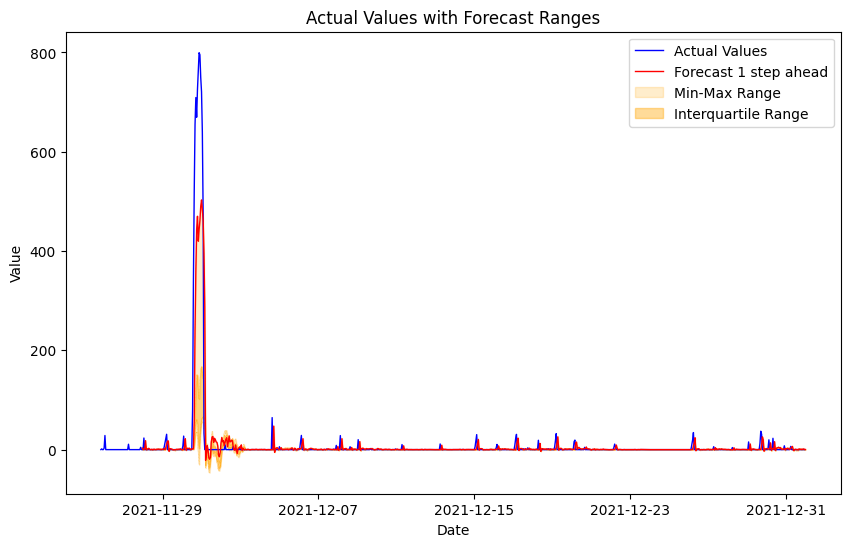

In [30]:
prediction_wrapper.plot_forecast_for_all(forecast_step_ahead=1, plot_forecast_distribution=True)

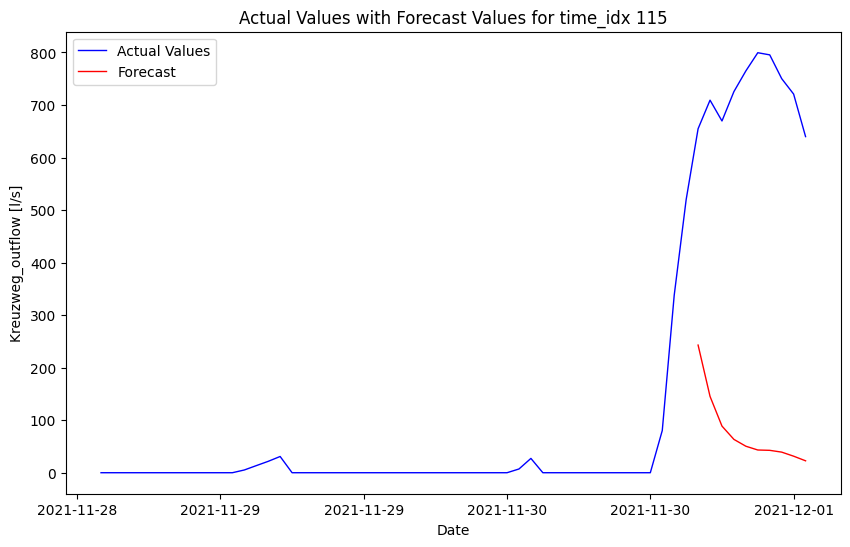

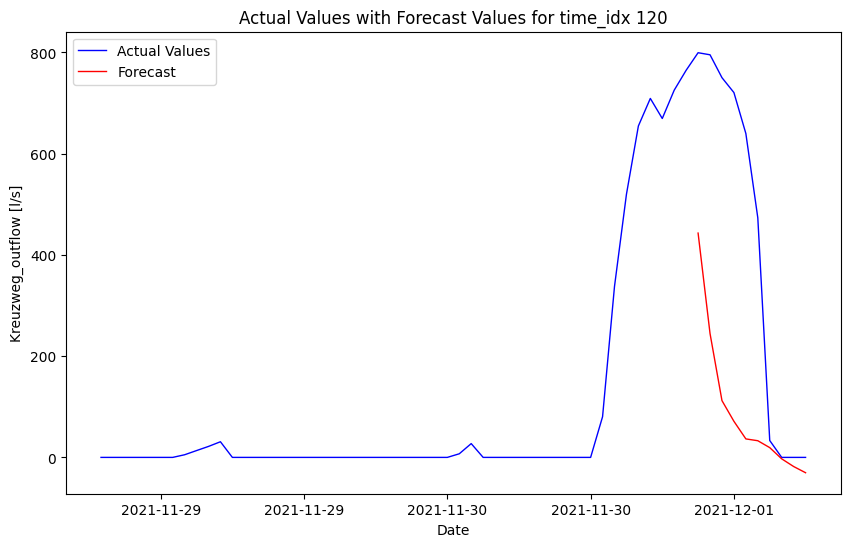

In [31]:
prediction_wrapper.plot_forecast_per_time_idx(115)
prediction_wrapper.plot_forecast_per_time_idx(120)

In [32]:
print(model)

NHiTS(
  	"activation":                        ReLU
  	"backcast_loss_ratio":               1.0
  	"batch_normalization":               False
  	"categorical_groups":                {}
  	"context_length":                    50
  	"downsample_frequencies":            [8, 2, 1]
  	"dropout":                           0.1
  	"embedding_labels":                  {}
  	"embedding_paddings":                []
  	"embedding_sizes":                   {}
  	"hidden_size":                       512
  	"initialization":                    lecun_normal
  	"interpolation_mode":                linear
  	"learning_rate":                     0.00012589254117941672
  	"log_gradient_flow":                 False
  	"log_interval":                      5
  	"log_val_interval":                  1
  	"logging_metrics":                   ModuleList(
  	  (0): SMAPE()
  	  (1): MAE()
  	  (2): RMSE()
  	  (3): MAPE()
  	  (4): MASE()
  	)
  	"loss":                              RMSE()
  	"monotone_constaints